In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Pre-processing Dataset

LINK DATASET : https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus

In [2]:
df = pd.read_csv('mental_health.csv')
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


In [4]:
# Missing Value Check
df.isna().sum()

text     0
label    0
dtype: int64

In [5]:
sentences = df['text']
labels = df['label']

<AxesSubplot:title={'center':'Count (target)'}>

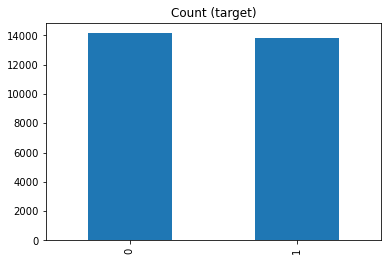

In [6]:
labels.value_counts().plot(kind='bar', title='Count (target)')

In [7]:
sentences.str.lower()

0        dear american teens question dutch person hear...
1        nothing look forward lifei dont many reasons k...
2        music recommendations im looking expand playli...
3        im done trying feel betterthe reason im still ...
4        worried  year old girl subject domestic physic...
                               ...                        
27972    posting everyday people stop caring  religion ...
27973    okay definetly need hear guys opinion ive pret...
27974    cant get dog think ill kill myselfthe last thi...
27975    whats point princess bridei really think like ...
27976    got nudes person might might know snapchat do ...
Name: text, Length: 27977, dtype: object

In [8]:
training_split = 0.8

### Split the Dataset

In [9]:
training_size = int(training_split * df.shape[0])
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[:training_size]
testing_labels = labels[training_size:]

### Generate Vocabulary and Padded Sequences

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
max_length = 120
vocab_size = 10000

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)


## Build and Compile the Model

In [11]:
embedding_dim = 16
filters = 128
kernel_size = 5

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Bidirectional(LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                        

## Train the Model

In [12]:
num_epochs = 15

# Train the model
history = model.fit(training_padded, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    verbose=2)

Epoch 1/15
700/700 - 5s - loss: 0.3124 - accuracy: 0.8675 - val_loss: 0.2217 - val_accuracy: 0.9121 - 5s/epoch - 8ms/step
Epoch 2/15
700/700 - 5s - loss: 0.1746 - accuracy: 0.9345 - val_loss: 0.2232 - val_accuracy: 0.9148 - 5s/epoch - 7ms/step
Epoch 3/15
700/700 - 5s - loss: 0.1354 - accuracy: 0.9506 - val_loss: 0.2377 - val_accuracy: 0.9103 - 5s/epoch - 7ms/step
Epoch 4/15
700/700 - 4s - loss: 0.1093 - accuracy: 0.9606 - val_loss: 0.2596 - val_accuracy: 0.9112 - 4s/epoch - 6ms/step
Epoch 5/15
700/700 - 4s - loss: 0.0916 - accuracy: 0.9689 - val_loss: 0.3092 - val_accuracy: 0.9049 - 4s/epoch - 6ms/step
Epoch 6/15
700/700 - 5s - loss: 0.0763 - accuracy: 0.9736 - val_loss: 0.3429 - val_accuracy: 0.9040 - 5s/epoch - 7ms/step
Epoch 7/15
700/700 - 5s - loss: 0.0652 - accuracy: 0.9776 - val_loss: 0.3754 - val_accuracy: 0.8990 - 5s/epoch - 7ms/step
Epoch 8/15
700/700 - 5s - loss: 0.0544 - accuracy: 0.9822 - val_loss: 0.4178 - val_accuracy: 0.8981 - 5s/epoch - 7ms/step
Epoch 9/15
700/700 - 5s 

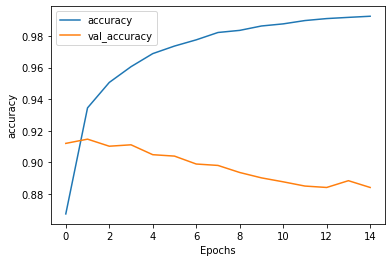

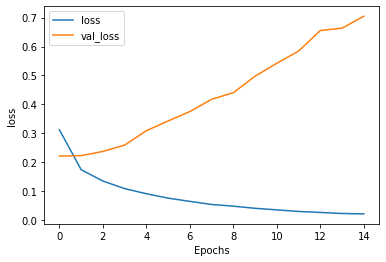

In [13]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')